<a href="https://colab.research.google.com/github/O-Kpy/Kaggle/blob/main/WeatherAUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
%config inLineBackend.figure_format = 'retina' 
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from pywaffle import Waffle
import plotly.graph_objects as go
from matplotlib.gridspec import GridSpec

In [1]:
pip install pywaffle

     |████████████████████████████████| 532kB 4.1MB/s 


In [3]:
!pip install plotly.express

  Using cached https://files.pythonhosted.org/packages/d4/d6/8a2906f51e073a4be80cab35cfa10e7a34853e60f3ed5304ac470852a08d/plotly_express-0.4.1-py2.py3-none-any.whl


In [4]:
!pip install --upgrade plotly

     |████████████████████████████████| 13.2MB 312kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [7]:
data = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/weatherAUS.csv')

In [29]:
data.shape

(145460, 23)



---


# **READ ME**


---


> 호주의 내일 날씨를 예측한다. (target='RainTomorrow')

> rows는 145460, col은 23로 구성되있다.

> Null값이 많다.(심지어 target변수에도 Null값이 꽤 있다.)

> 범주형 데이터와 연속형 데이터가 혼합되어있다.



---


목차


1.   데이터 Null값을 확인한다.
2.   EDA를 진행한다.
3.   데이터 클렌징을 실시

==> 상관계수를 확인해 Null값을 처리를 한다, 연속형변수의 범주화와 원핫코딩을 실시한다
 
 **Target에 있는 Null값들은 test함수로 다시 옮겨 쓰겠다.

4.  데이터 분할
5.  데이터 모델링(Logistic, 의사결정, SVM, KNN, ...)
6.  모델링 성능평가(교차검증, confusion matrix, GridsearchCV...)


---
**컬럼(columns)들 설명**

Date : The date of observation

Location : The common name of the location of the weather station

MinTemp : The minimum temperature in degrees celsius

MaxTemp : The maximum temperature in degrees celsius

Rainfall : The amount of rainfall recorded for the day in mm

Evaporation : The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine : The number of hours of bright sunshine in the day.

WindGustDir : The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed : The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am : Direction of the wind at 9am

WindDir3pm : Direction of the wind at 3pm

WindSpeed9am : Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm : Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am : Humidity (percent) at 9am

Humidity3pm : Humidity (percent) at 3pm

Pressure9am : Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm : Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am : Fraction of sky obscured by cloud at 9am. This is measured in "oktas", 
which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.

Cloud3pm : Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See 
Cload9am for a description of the values

Temp9am : Temperature (degrees C) at 9am

Temp3pm : Temperature (degrees C) at 3pm

RainToday : Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow : The target variable. Did it rain tomorrow?


In [12]:
data
## 데이터 확인

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Null값 확인
msno, concat테이블로 확인

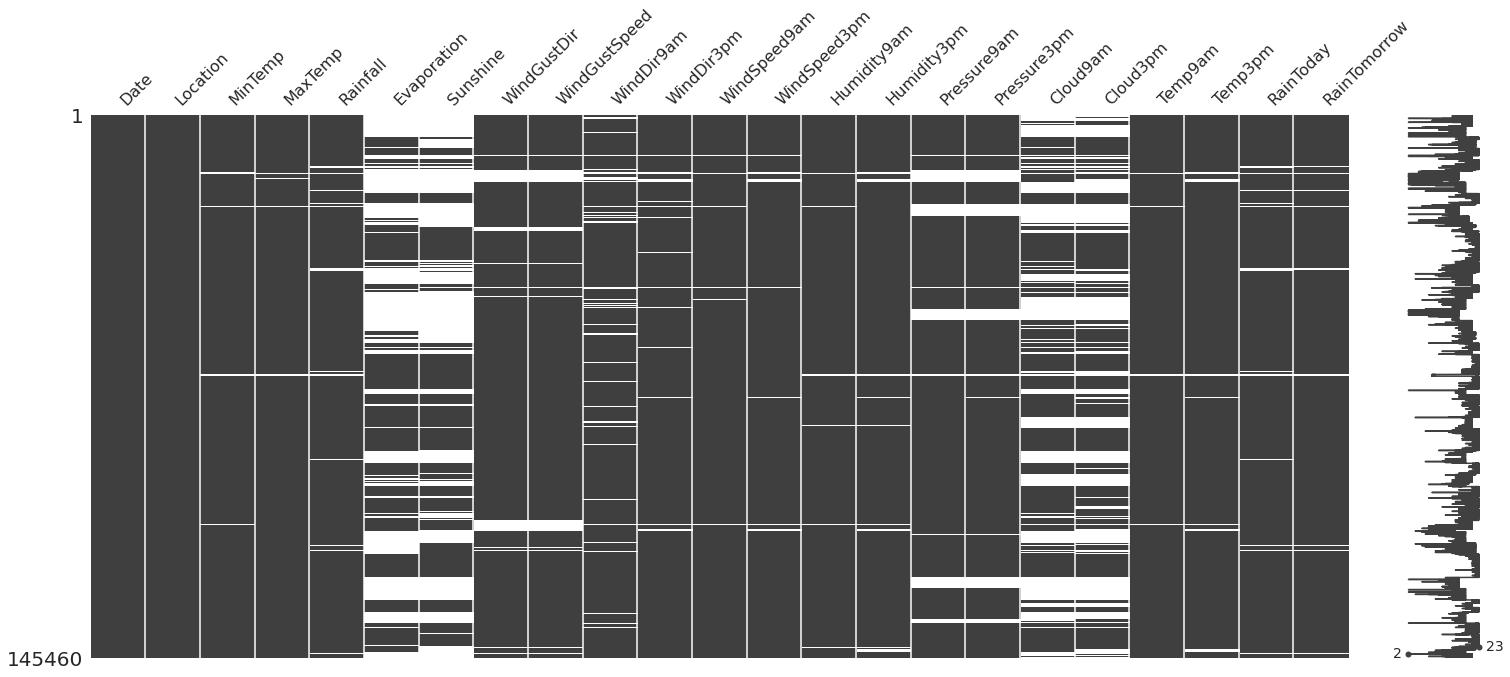

In [9]:
msno.matrix(data)

In [55]:
def H_Nan(d_f):
  n_sum = d_f.isnull().sum()
  n_per = round(d_f.isnull().sum()/len(d_f)*100, 2)

  n_table = pd.concat([n_sum, n_per], axis=1)
  n_table.columns=['Sum', 'Percentage']
  n_table = n_table.sort_values(by='Percentage', ascending=False)
  return n_table

H_Nan(data)

,Sum,Percentage
Sunshine,69835,48.01
Evaporation,62790,43.17
Cloud3pm,59358,40.81
Cloud9am,55888,38.42
Pressure9am,15065,10.36
Pressure3pm,15028,10.33
WindDir9am,10566,7.26
WindGustDir,10326,7.10
WindGustSpeed,10263,7.06
Humidity3pm,4507,3.10


# 'Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am'는 거의 절반이 Null값이다.

절반이 넘는 Null값들을 어떻게 처리할지 고민...



---


# 탐색적 데이터 분석(EDA)

---

Null값들을 처리하기 앞서 먼저 EDA를 실시한다.

Date열을 이용해 시계열 데이터형식으로 (pd.to_datetime 사용) 시각화

여러가지 시각화 툴을 이용해 시각화

In [57]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
## str으로 되어있는 'Date'를 datetime형식으로 변환

In [60]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
## 'Date'열을 year,month,day로 분리

In [61]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,2017,6,21
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,2017,6,22
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,2017,6,23
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,2017,6,24


In [85]:
date_ymd = data.groupby(['Year', 'Month'])['Day'].value_counts().reset_index(name='counts')
date_ymd

,Year,Month,Day,counts
0,2007,11,1,1
1,2007,11,2,1
2,2007,11,3,1
3,2007,11,4,1
4,2007,11,5,1
...,...,...,...,...
3431,2017,6,21,49
3432,2017,6,22,49
3433,2017,6,23,49
3434,2017,6,24,49


In [87]:
px.treemap(data_frame=date_ymd, path=['Year', 'Month', 'Day'], values='counts', color_discrete_sequence=px.colors.qualitative.Antique)

# 트리맵 시각화에서 얻을수 있는점 ==>

1. 매일매일 측정을 한것은 아니다. 
2. 2007년은 측정일수가 너무 적다.
4. 마지막 측정일자는 2017-06-25


# Location을 가지고 시각화





In [121]:
print(f"측정한 도시의 개수는 총 {data['Location'].nunique()}개 이고, ", end="")
print(f"측정한 도시 이름은 {data['Location'].unique()}")

측정한 도시의 개수는 총 49개 이고, 측정한 도시 이름은 ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


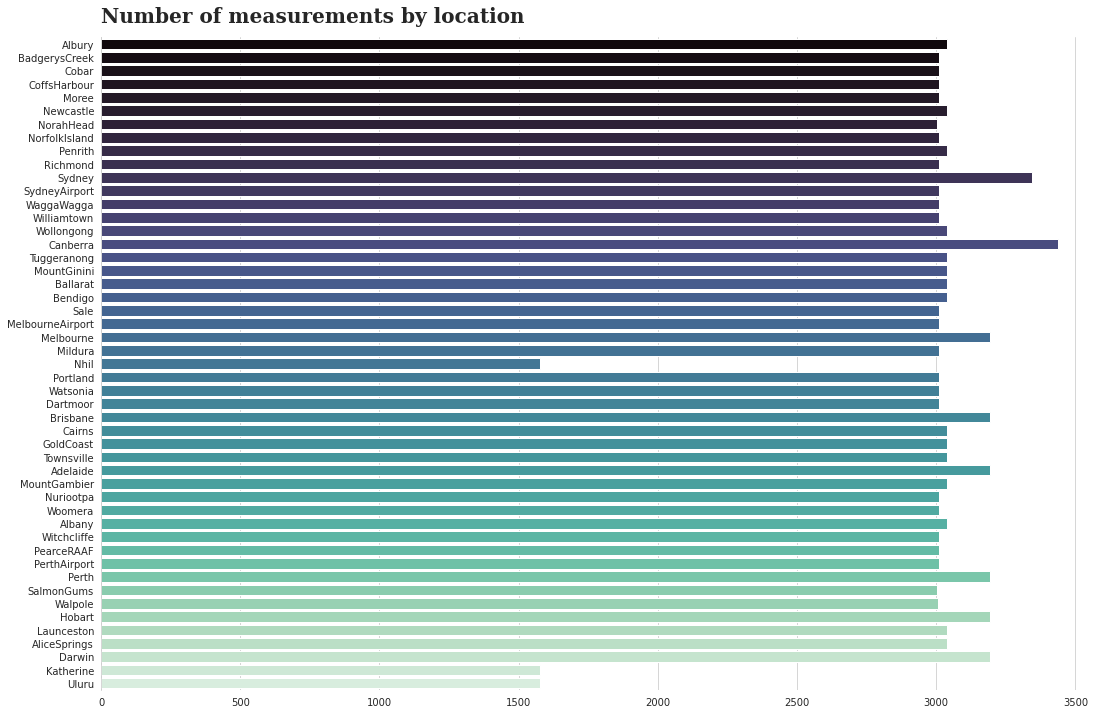

In [109]:
fig, ax= plt.subplots(figsize=(18,12))
ax = sns.countplot(y=data['Location'], palette=sns.color_palette("mako", n_colors=len(data['Location'].value_counts().index)))
ax.set_title('Number of measurements by location', fontsize=20, fontweight='bold', fontfamily='serif', pad=15, loc='left')
ax.set_xlabel('')
ax.set_ylabel('')
for i in ['top', 'bottom', 'right']:
  ax.spines[i].set_visible(False)

대부분의 도시에서 3000번이 넘는 데이터 측정을 했다.
하지만 'Nhill', 'Katherine', 'Uluru'의 데이터 측정(절반)을 하지 않았다.